This file is a follow on from the previous `PMFgeneration.ipynb` file. The goal is to walk through how to take the output from the simulations and use them in United Atom. The UA guide goes over this quite well however more info never hurts.

To be ready to use Polypropylene files in NPCoronaPredict GUI we must complete the following steps:

1. We must upscale our PMFs to get the require surface PMFs
2. We must calculate the Hamaker.
3. We must update the Material set.

To upscale our PMFs we use the `UpscaleBeads_v2-2.py` script. It is provided here and shipped with standard UA installation. The version in this folder has its bead radius adjusted to be the radius of gyration of the Polypropylene bead.

To use this file, first copy the folder containing the single bead PMFs to the `surface` folder. Next in `UpscaleBeads_v2-2.py` change the name of target material to the name of the folder. The script will be looking for `surface/foldername`. If you are using the version in this folder, copy it into your tools folder. This version assume your PMF folder name is "PP".

Then you run the script. We recommend using nohop or screen command to run it in the background as it can take some time. You can also adjust the radius of the output bead radius. The output will be in the surface folder as something like `PP-Plane-...`. 

Next we will calculate the Hamaker. To do this simply copy the `CalcLifschitzHamaker.ipynb` file to the `tools/CalcLifshitzHamaker`. The file here contains the correct information for PP taken from academic papers.  This will output a `.dat` file. Copy this file and move it to the `hamaker` folder. 

Now we can update the `MaterialSet.csv` file. 
This is the file that is loaded into United Atom and NPCoronaPredict GUI. It tells the programme
where everything is.

In the material set we have lines like this

#Material name, surface folder, Hamaker file, default shape, LJ cutoff

silicaquartz,surface/SiO2-Quartz,hamaker/SiO2_Quartz.dat,1

We want to do 2 updates right now. One for the original beads and one for the upscaled plane.
We want to do 2 as it will allow us the properly Pegylate our nanoparticle using NPDesigner. 1 is for sphere. Example additions would be

PPbead, surface/PP, hamaker/PP.dat,1, 1.2

PP-plane, surface/PP-plane, hamaker/PP.dat,1, 1.2

With these files adjsuted and added, you can now follow the standard NPCoronaPredict GUI manual to predict binding affinities.


# AA adsorption

By adding the amino acids pdbs to the proteins folder in NPCoronaPrecit, we can calculate the Boltzmann minimum adsorption of amino acids on the models. 

This admitadly was done by hand, by loading in the different models and all the amino acids, and writing the results into a `AAvalues.txt` file, provided here. I am a little embarressed I did it by hand and did not find a way to do it automatically, but it did work.

/var/folders/91/m5nbnsy55w9cpmpb7kvf0d8h0000gn/T/ipykernel_94745/2528839413.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(AAs))  # 'tab20' is a categorical colormap


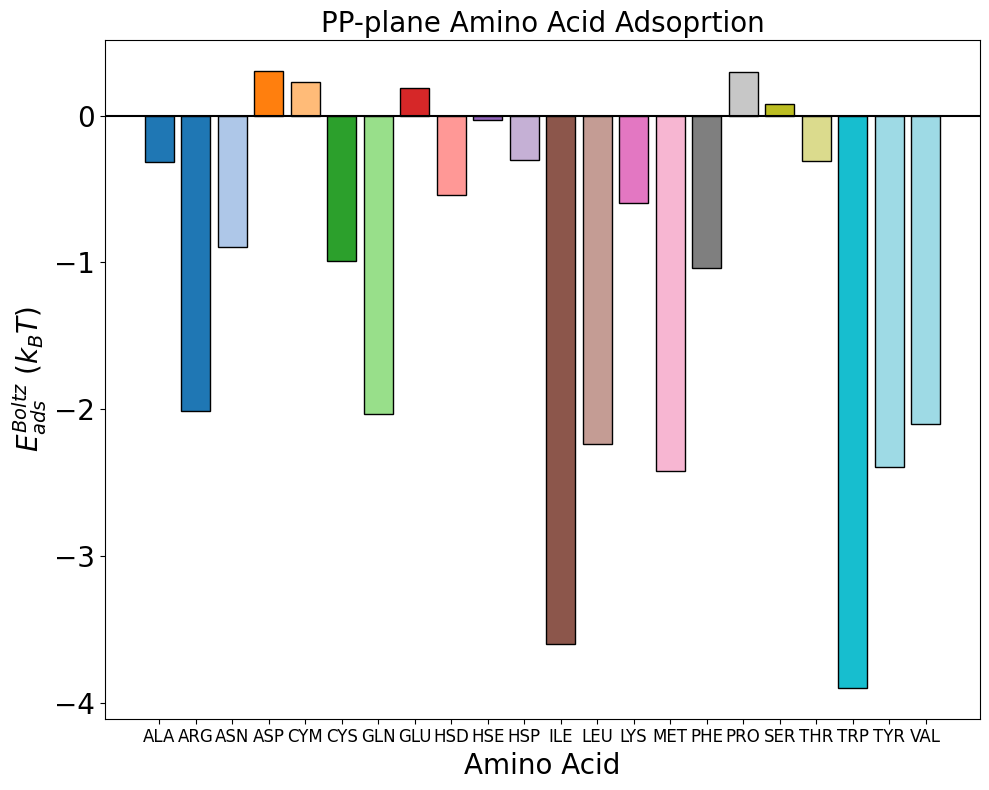

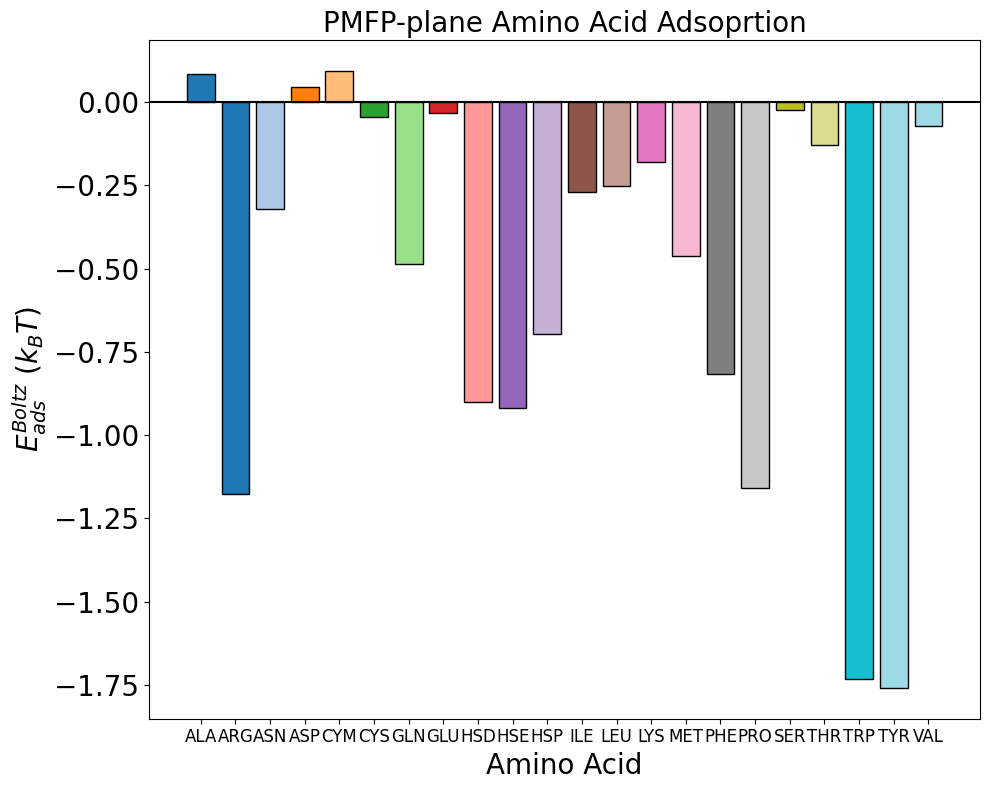

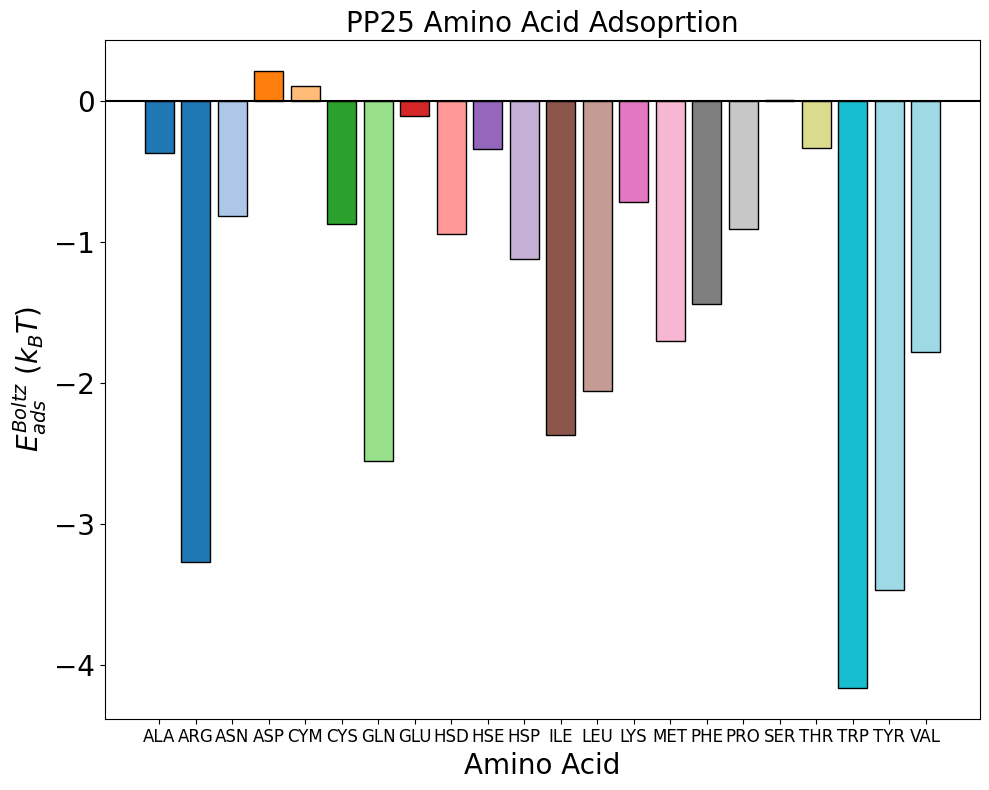

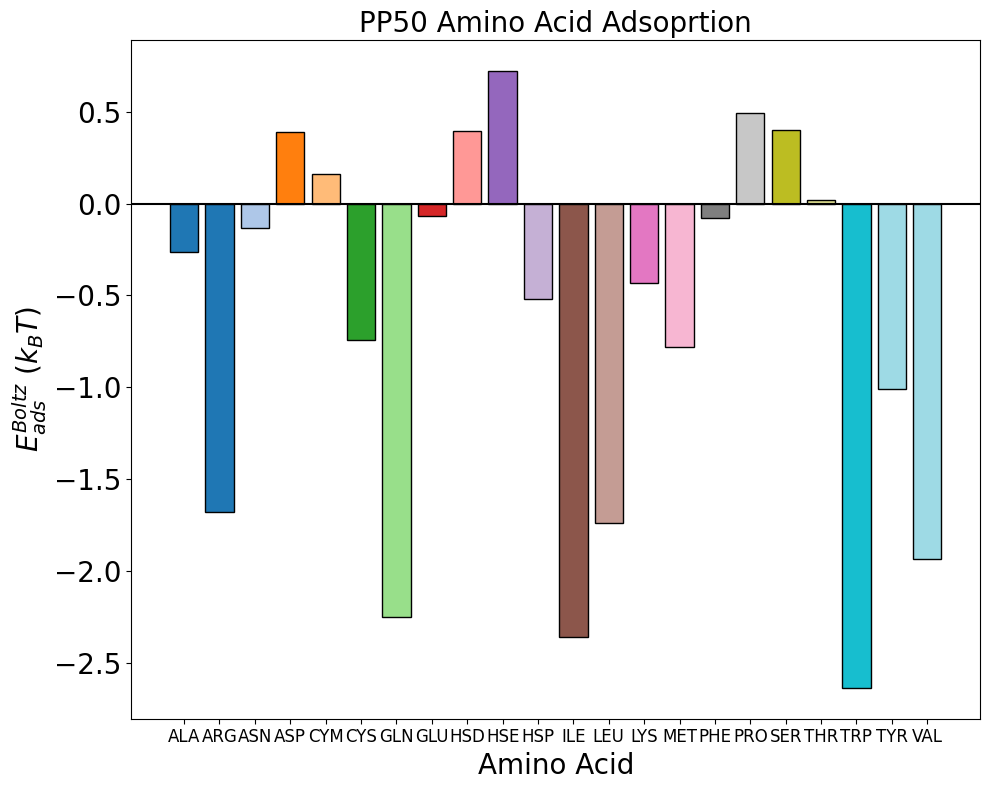

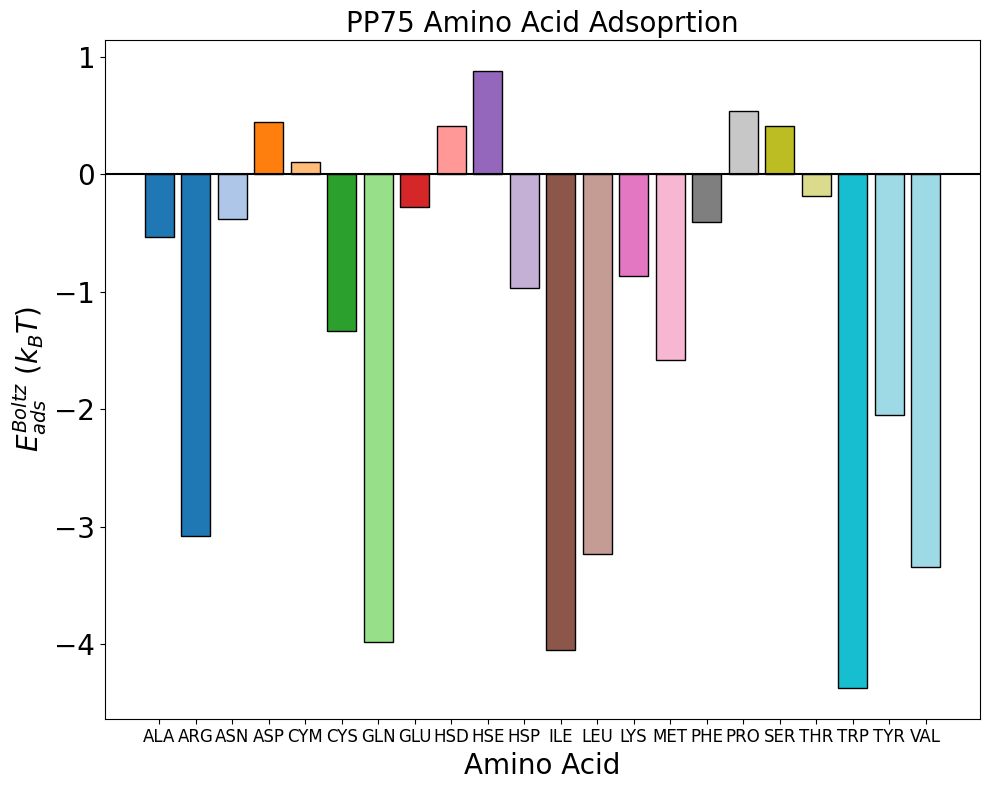

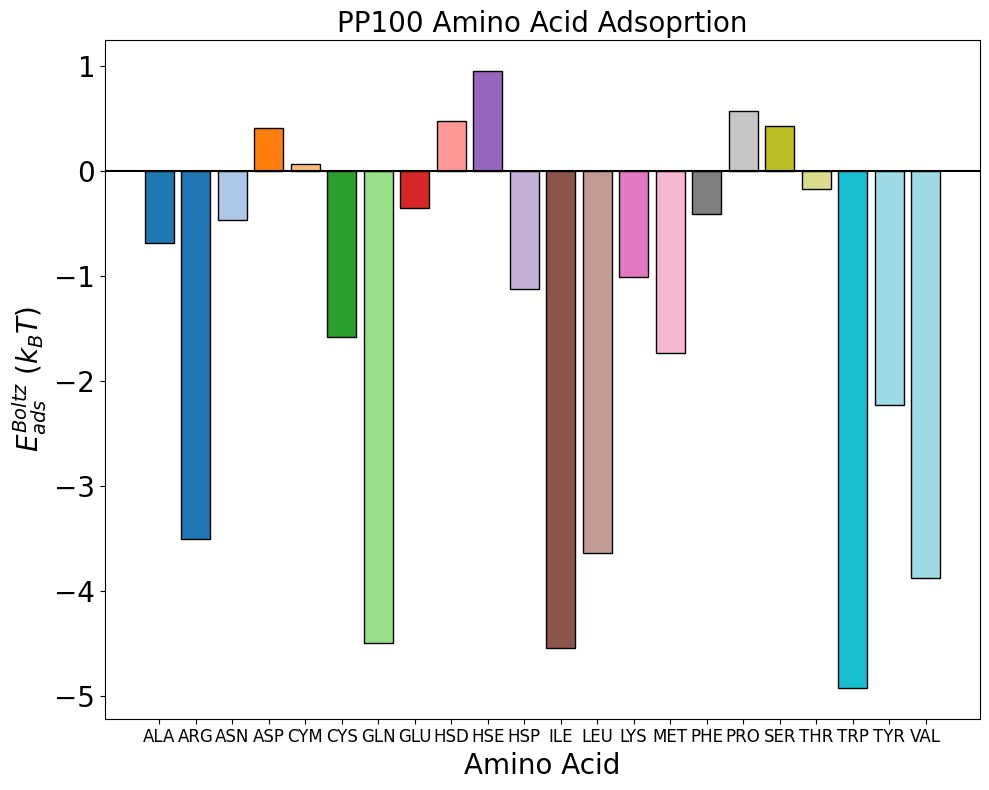

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# ORDER: PP-plane, PMFP-plane. PP25, PP50, PP75, PP100

AAs = ["ALA", "ARG", "ASN", "ASP", "CYM", "CYS", "GLN", "GLU", "HSD", "HSE", "HSP", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER",
       "THR", "TRP", "TYR", "VAL"]
data = np.genfromtxt("AAvalues.txt", delimiter=None)
list = [0, 1, 2, 3, 4, 5]
models = ["PP-plane", "PMFP-plane", "PP25", "PP50", "PP75", "PP100"]

cmap = cm.get_cmap('tab20', len(AAs))  # 'tab20' is a categorical colormap
colors = [cmap(i) for i in range(len(AAs))]
w = 0.8
for i in list:
    plt.figure(figsize=(10,8))
    plt.bar(AAs, data[:,i+1], width=w, edgecolor='k', color=colors)
    plt.axhline(y=0, color='k')
    plt.ylabel(r"$E^{Boltz}_{ads}$ $(k_BT)$", fontsize=20)
    plt.xlabel('Amino Acid', fontsize=20)
    plt.title(models[i] + " Amino Acid Adsoprtion", fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.savefig("../graphs/" + models[i] + " Amino Acid Adsoprtion.pdf", format="pdf")
    plt.show()

# Proteind Adsoprtion

Similarly to the AA adsorption we can calculate the Protein adsorption, which I once again did by hand XD. 

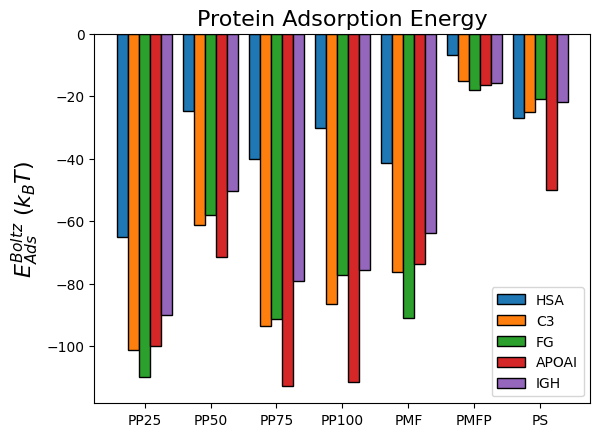

In [4]:
import numpy as np
import matplotlib.pyplot as plt


proteins = ["HSA", "C3", "FG", "APOAI", "IGH"]

models = ['PP25', 'PP50', 'PP75', "PP100", "PMF", "PMFP", "PS"] # categories
HSA, IGH, C3, FG, APOAI = [-65.149, -24.597, -40.237, -30.03, -41.448, -6.679, -27], [-89.996, -50.189, -79.268, -75.738, -63.774, -15.712, -22], [ -101.07, -61.32, -93.563, -86.605, -76.222, -15.091, -25], [-109.995, -58.09, -91.417, -77.294, -91.079, -17.891, -21], [ -99.953, -71.419, -112.634, -111.412, -73.618, -16.386, -50]

# Bar width and x locations
w, x = 0.2, np.array([0, 1.2, 2.4, 3.6, 4.8, 6.0, 7.2])

fig, ax = plt.subplots()
ax.bar(x - 2*w, HSA, width=w, label='HSA', edgecolor='k')
ax.bar(x - w, C3, width=w, label='C3', edgecolor='k')
ax.bar(x, FG, width=w, label='FG', edgecolor='k')
ax.bar(x + w, APOAI, width=w, label='APOAI', edgecolor='k')
ax.bar(x + 2*w, IGH, width=w, label='IGH', edgecolor='k')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel(r'$E^{Boltz}_{Ads}$ $(k_BT)$', fontsize=16)
ax.set_title('Protein Adsorption Energy', fontsize=16)
ax.legend()
#plt.savefig("../graphs/Proteinads.pdf", format="pdf")
plt.show()

# Corona KMC

From running the CornaKMC we can acquire the Adsorption Energy Surface (AES), or heatmaps of adsorption. We also obtain final corona coverage from these simulations. All results are shown in the `KMCresults` folder.

I recommend following the United Atom documentation very closely. In the `KMCresults` folder we have the 12 simulation folders. Inside each folder is the output, proteins, results, the `log.txt`, `coronakmcinput.csv` and `serum.csv`m files. There is also a autogenerated configuration file. 

The `log.txt` file shows what was passsed as the inputs for the KMC simulations and can be completely copied. In some of the `log.txt` we pass `-m anatase101` as the material,  instead of the polypropylene, this is because at the time there was a bug in code, resulting in only anatase101 working. This was worked around by changing how anatase101 was defined in the `MaterialSet.csv`. 

## AES MAPS

In [2]:
import os
# Check in home directory/PPsimulation
wd = os.getcwd()
wd

'/Users/brianmaloney/Desktop/MastersProject/PPsimulation'

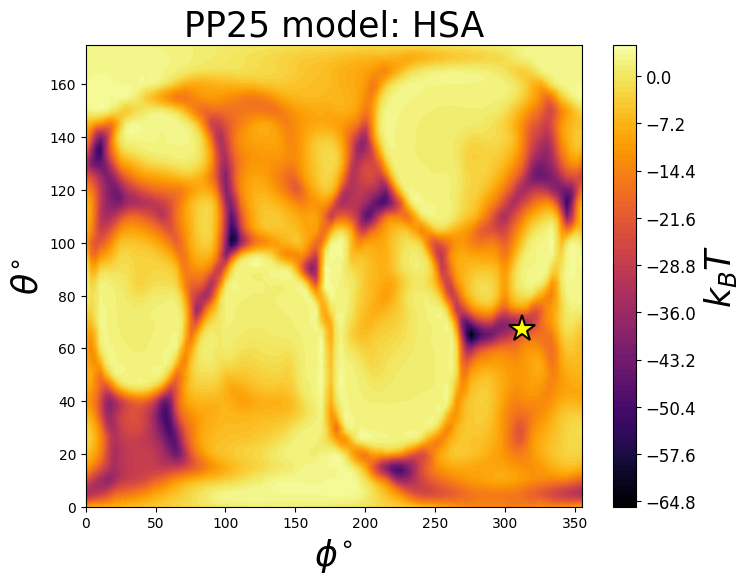

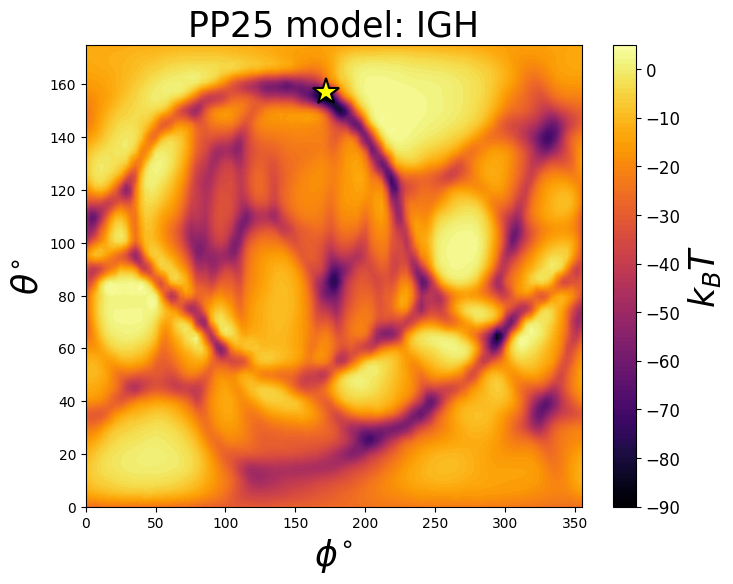

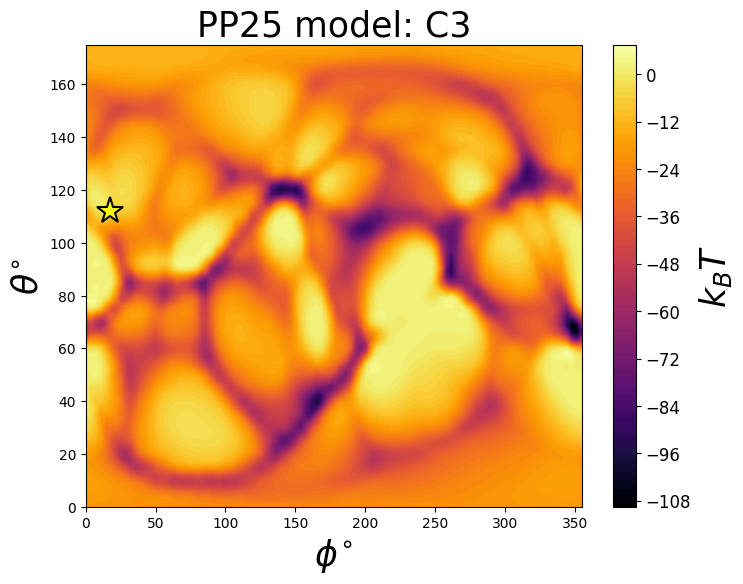

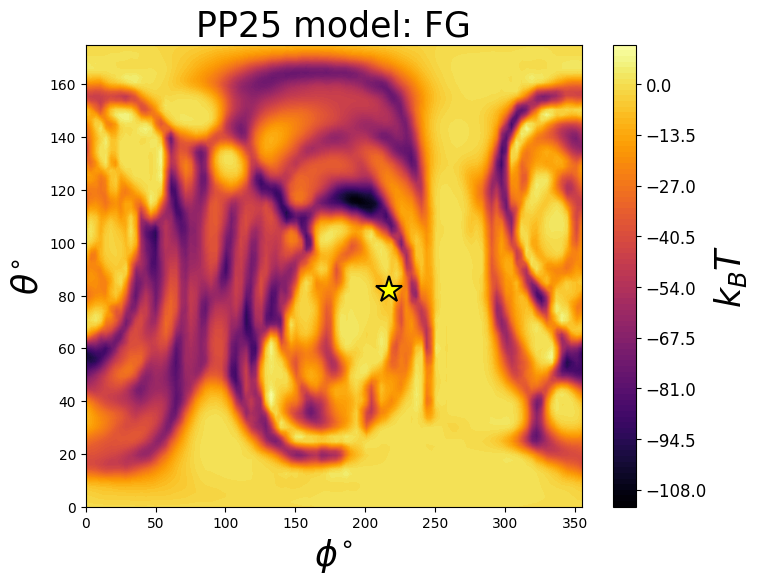

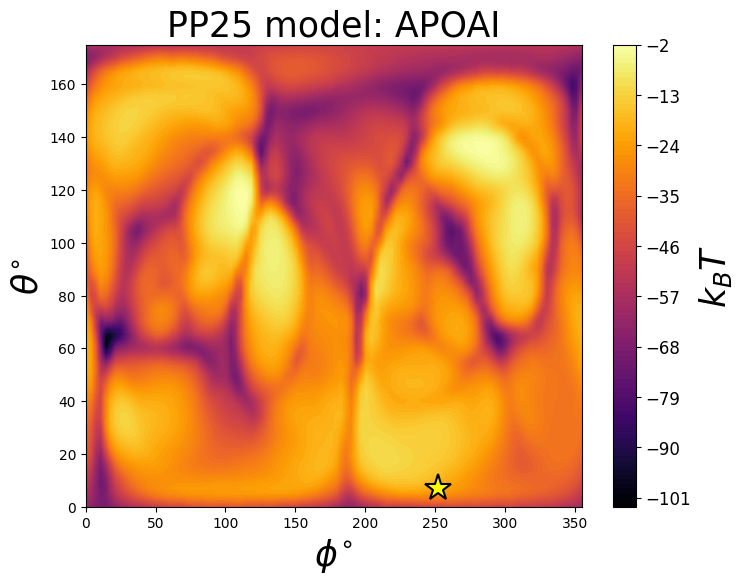

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata as gd

os.chdir("KMCresults")

#files = ["PP25", "PP50", "PP75", "PP100", "PPplane", "PPpmfp"]
files = ["PP25"]
proteins = ["1AO6-P1_10_0", "1HZH-P5_10_0", "2A73-P2_10_0", "3GHG-P3_10_0", "3K2S-P4_10_0" ]
proteinnames = {"1AO6-P1_10_0":"HSA", "1HZH-P5_10_0":"IGH", "2A73-P2_10_0":"C3", "3GHG-P3_10_0":"FG", "3K2S-P4_10_0":"APOAI"}
boltzmin = {"PP25HSA":[312, 67.4], "PP25IGH":[172, 157], "PP25C3":[17, 112], "PP25FG":[217, 82], "PP25APOAI":[252, 7],
            "PP50HSA":[287, 62], "PP50IGH":[187, 82], "PP50C3":[202, 107], "PP50FG":[122, 62], "PP50APOAI":[22, 32],
            "PP75HSA":[287, 62], "PP75IGH":[187, 87], "PP75C3":[192, 107], "PP75FG":[122, 62], "PP75APOAI":[22, 32],
            "PP100HSA":[52, 122], "PP100IGH":[187, 82], "PP100C3":[192, 117], "PP100FG":[122, 62], "PP100APOAI":[267, 112],
            "PPplaneHSA":[287, 62], "PPplaneIGH":[172, 157], "PPplaneC3":[187, 117], "PPplaneFG":[332, 147], "PPplaneAPOAI":[27, 12],
            "PPpmfpHSA":[27, 22], "PPpmfpIGH":[47, 67], "PPpmfpC3":[112, 112], "PPpmfpFG":[112, 112], "PPpmfpAPOAI":[252, 7]
            }

for file in files:
    for protein in proteins:
        
        data = np.genfromtxt(file + "_steady_60/results/" + file + "/" + protein + ".uam", delimiter=None, skip_header=4)
        phi = data[:,0]
        theta = data[:,1]
        Eads = data[:,2]

        phi_lin = np.linspace(min(phi), max(phi), 100)
        theta_lin = np.linspace(min(theta), max(theta), 100)
        PHI, THETA = np.meshgrid(phi_lin, theta_lin)

        EADS_grid = gd((phi, theta), Eads, (PHI, THETA), method='cubic')

        # Plotting
        plt.figure(figsize=(8, 6))
        heatmap = plt.contourf(PHI, THETA, EADS_grid, levels=100, cmap='inferno')
        cbar = plt.colorbar(heatmap)
        cbar.set_label(r'$k_BT$', fontsize=25)  # Change label font size
        cbar.ax.tick_params(labelsize=12)
        name = proteinnames[protein]
        plt.plot(boltzmin[file+name][0], boltzmin[file+name][1], marker='*', color='yellow', markersize=20, markeredgewidth=1.5, markeredgecolor='black')
        plt.xlabel(r'$\phi^{\circ}$', fontsize=25)
        plt.ylabel(r'$\theta^{\circ}$', fontsize=25)
        plt.title('{} model: {}'.format(file, name), fontsize=25)
        #plt.grid(True)
        #plt.savefig('../graphs/{} model: {}.pdf'.format(file, name), format="pdf")
        plt.show()


## Corona Evolution

Max Corona Coverage: 0.8008928902750755


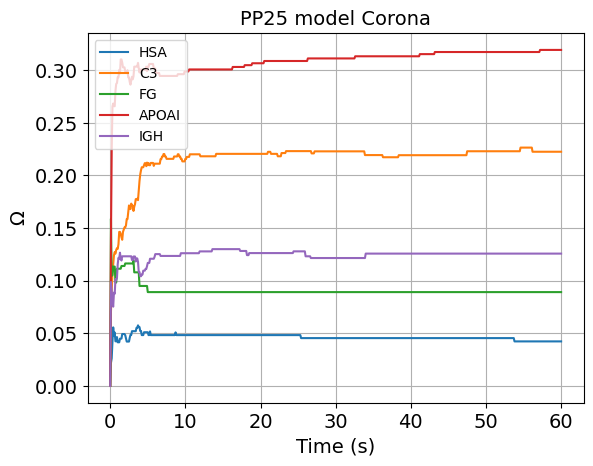

Max Corona Coverage: 0.8436275002753355


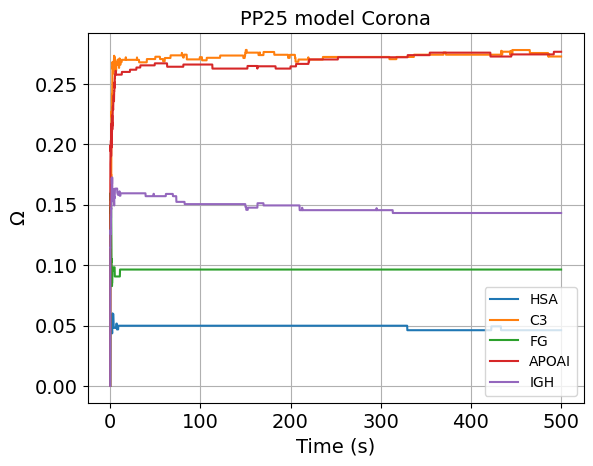

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

files = ["PP25", "PP50", "PP75", "PP100", "PPplane", "PPpmfp"]
files = ["PP25"]

for file in files:
    data = np.genfromtxt(file + "_steady_60/coronakmc_output/kmc_running_coronakmcinput.csv_10.0_s0_hs_0_coverage.txt", delimiter=" ", skip_header=1)
    
    time = data[:,0]
    pdb1AO6 = data[:,1]
    pdb2A73 = data[:,2]
    pdb3GHG = data[:,3]
    pdb3K2S = data[:,4]
    pdb1HZH = data[:,5]
    totalcoverage = data[:,-1]
    print("Total Corona Coverage: " + str(max(totalcoverage)))

    plt.plot(time, pdb1AO6, label = "HSA")
    plt.plot(time, pdb2A73, label = "C3")
    plt.plot(time, pdb3GHG, label = "FG")
    plt.plot(time, pdb3K2S, label = "APOAI")
    plt.plot(time, pdb1HZH, label = "IGH")
    #plt.plot(time, totalcoverage, label = r"$\Omega_t$: Total coverage")

    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel(r"$\Omega$", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(file + " model Corona", fontsize=14)
    plt.legend()
    plt.grid()
    #plt.savefig("../graphs/" + file + " model Corona_60.pdf", format="pdf")
    plt.show()
    
    
for file in files:
    data = np.genfromtxt(file + "_steady_500/coronakmc_output/kmc_running_coronakmcinput.csv_10.0_s0_hs_0_coverage.txt", delimiter=" ", skip_header=1)
    
    time = data[:,0]
    pdb1AO6 = data[:,1]
    pdb2A73 = data[:,2]
    pdb3GHG = data[:,3]
    pdb3K2S = data[:,4]
    pdb1HZH = data[:,5]
    totalcoverage = data[:,-1]
    print("Total Corona Coverage: " + str( max(totalcoverage)))

    plt.plot(time, pdb1AO6, label = "HSA")
    plt.plot(time, pdb2A73, label = "C3")
    plt.plot(time, pdb3GHG, label = "FG")
    plt.plot(time, pdb3K2S, label = "APOAI")
    plt.plot(time, pdb1HZH, label = "IGH")
    #plt.plot(time, totalcoverage, label = r"$\Omega_t$: Total coverage")

    plt.xlabel("Time (s)", fontsize=14)
    plt.ylabel(r"$\Omega$", fontsize=14)
    plt.title(file + " model Corona", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend()
    plt.grid()
    #plt.savefig("../graphs/" + file + " model Corona_500.pdf", format="pdf")
    plt.show()

## KMC Visualisation

Using the `_finalcoords` we can visualise the proteins and NP.

In [3]:
import os
os.chdir("KMCresults")

In [4]:
# Seperate plots

from matplotlib.colors import to_rgb
protein_colors = {
    "1AO6": to_rgb("blue"),
    "2A73": to_rgb("orange"),
    "3GHG": to_rgb("green"),
    "3K2S": to_rgb("red"),
    "1HZH": to_rgb("purple")
}

default_color = [0.5, 0.5, 0.5]  # gray
# radius chosen for visualisation help
protein_radius = {
    "1AO6": 1,
    "2A73": 2,
    "3GHG": 3,
    "3K2S": 3,
    "1HZH": 2
    
}



In [5]:
import numpy as np
import nglview as nv
import pandas as pd
import matplotlib.pyplot as plt


files = [
    "PP25_steady_60/coronakmc_output/coronakmcinput.csv_finalcoords_10.0_s0.txt",
    "PP50_steady_60/coronakmc_output/coronakmcinput.csv_finalcoords_10.0_s0.txt",
    "PP75_steady_60/coronakmc_output/coronakmcinput.csv_finalcoords_10.0_s0.txt",
    "PP100_steady_60/coronakmc_output/coronakmcinput.csv_finalcoords_10.0_s0.txt",
    "PPplane_steady_60/coronakmc_output/coronakmcinput.csv_finalcoords_10.0_s0.txt",
    "PPpmfp_steady_60/coronakmc_output/coronakmcinput.csv_finalcoords_10.0_s0.txt"
]

# Store viewers if you want to display them later
viewers = []

for file in files:
    plotArr = [["PP", 0.0, 0.0, 0.0, 13, [0.5, 0.5, 0.5]]]
    data = np.genfromtxt(file, delimiter=",", dtype=str)
    
    for line in data:
        label_full = line[0]
        protein_name = label_full.split("-")[0]  # Extract protein
        x = float(line[1])
        y = float(line[2])
        z = float(line[3])
        r = protein_radius.get(protein_name, 10)
        color = protein_colors.get(protein_name, default_color)  # use hex string
        
        plotArr.append([label_full, x, y, z, r, color])
    #print([label_full, x, y, z, r, color])
    
    # Create a new NGLView widget per file
    view = nv.NGLWidget()
    view._remote_call('setSize', target='Widget', args=['600px','600px'])
    shape = view.shape
    
    for line in plotArr:
        label, x, y, z, r, color = line
        shape.add_sphere([x, y, z], color, r, label)

    
    viewers.append(view)


In [6]:
display(viewers[0])

NGLWidget()